**Gestione Energetica ed Automazione negli Edifici (GEAE) A.A. 2024/2025**

*Tutto il materiale didattico messo a disposizione degli studenti (compresi script, markdown, presentazioni, video e Virtual Classroom) è da utilizzarsi esclusivamente per scopi didattici e nell’ambito del corso di “gestione energetica e automazione negli edifici”. È vietata ogni forma di utilizzo diverso, redistribuzione e pubblicazione on line. Per ogni eventuale dubbio o richiesta contattare il titolare del corso prof. Alfonso Capozzoli a alfonso.capozzoli@polito.it*

# Introduction to Deep Neural Networks with PyTorch

Install the library `pytorch` before proceeding. Open terminal and run the following command:

`pip3 install torch`

## Multi-Layer Perceptron (MLP) in PyTorch

### Importing Libraries

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

from torch.utils.data import DataLoader, TensorDataset

### Creating MLP Class

In [2]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = torch.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        x = self.fc3(x)
        return x

 **`class MLP(nn.Module):`**
- This line defines a new class `MLP`, which stands for Multi-Layer Perceptron. It inherits from **`nn.Module`**, the base class for all neural network modules in PyTorch.
- In this class, we will define the architecture of the MLP model.
- The `__init__` method is the constructor where we define the layers of the MLP.
- The `forward` method defines how the input data passes through the network layers.
- The `MLP` model consists of two fully connected layers: the first layer takes the input and transforms it using the specified number of hidden units, and the second layer produces the final output.
- The activation function used between the layers is ReLU (Rectified Linear Unit), which introduces non-linearity, allowing the model to learn more complex functions.


### Creating an Instance of the MLP Class

In [3]:
model = MLP(input_size=1, hidden_size=16, output_size=1)

**`model = MLP(input_size=1, hidden_size=16, output_size=1)`**
- This line creates an instance of the `MLP` class with an input size of `1`, a hidden layer with `16` neurons, and an output size of `1`.
- This model is a simple feed-forward neural network that is suitable for basic regression tasks.

### Printing the Model Architecture

In [4]:
print(model)

MLP(
  (fc1): Linear(in_features=1, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=1, bias=True)
)


### Defining Loss Function and Optimizer

In [5]:
criterion = nn.MSELoss()

**`criterion = nn.MSELoss()`**
- This line creates an instance of `nn.MSELoss`, which represents the Mean Squared Error loss function.
- This is used to measure the difference between predicted values and actual values during training.

In [6]:
optimizer = optim.RMSprop(model.parameters(), lr=0.01)

**`optimizer = optim.SGD(model.parameters(), lr=0.01)`**
- This line creates an optimizer (`SGD`) for training the model, which uses the Stochastic Gradient Descent algorithm.
- **`lr=0.01`** sets the learning rate, which controls how much the model's parameters are adjusted with each step.


In [7]:
epochs = 100  # Number of epochs for training

# Create random input and target data
inputs = torch.linspace(-10, 10, 1000).view(-1, 1)  # 1000 samples between -10 and 10
targets = 0.5 * inputs + torch.sin(inputs)  # targets have a more complex relationship with input

batch_size = 18

# Create a dataset from inputs and targets
dataset = TensorDataset(inputs, targets)

# Create DataLoader to handle batching
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    for batch_inputs, batch_targets in dataloader:
        # Forward pass
        outputs = model(batch_inputs)
        loss = criterion(outputs, batch_targets)

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Backward pass
        loss.backward()

        # Update weights
        optimizer.step()

    # Print loss every 10 epochs
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.0321
Epoch [20/100], Loss: 0.0308
Epoch [30/100], Loss: 0.0347
Epoch [40/100], Loss: 0.0059
Epoch [50/100], Loss: 0.0133
Epoch [60/100], Loss: 0.1783
Epoch [70/100], Loss: 0.0236
Epoch [80/100], Loss: 0.0065
Epoch [90/100], Loss: 0.0121
Epoch [100/100], Loss: 0.0257


In [8]:
# predictions on input data
predictions = model(inputs)

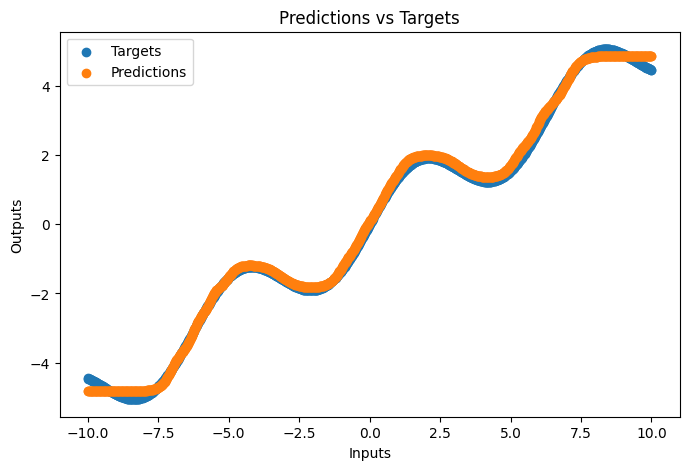

In [9]:
# plot predictions vs targets
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(inputs, targets, label='Targets')
plt.scatter(inputs, predictions.detach().numpy(), label='Predictions')
plt.xlabel('Inputs')
plt.ylabel('Outputs')
plt.title('Predictions vs Targets')
plt.legend()
plt.show()